In [1]:
import pandas as pd
import jieba
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019立委_research.csv')
politics = pd.read_csv('9th_legislator_promise.csv')

In [3]:
lin = fb[fb.page_name == "林岱樺"]
# 把時間格式轉換
lin['new_date'] = pd.to_datetime(lin['created_time_taipei']).dt.date
lin['post_hour'] = pd.to_datetime(lin['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
lin['month_year'] = pd.to_datetime(lin['new_date']).dt.to_period('M')

lin.head(1)

<ipython-input-3-2f934be25fc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin['new_date'] = pd.to_datetime(lin['created_time_taipei']).dt.date
<ipython-input-3-2f934be25fc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin['post_hour'] = pd.to_datetime(lin['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
<ipython-input-3-2f934be25fc7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
12960,139678436043353_2315740748437100,139678436043353,林岱樺,政治人物,一把火燒起的不只是工安！\n\n昨晚的一把巨火！\n再度燃點出咱林園的哀愁！\n\n居民們無奈地告訴岱樺\n這把火像奧運聖火、發爐、沒有光明的光明燈!\n岱樺知道字字句句間是種多年累積的哀述...\n工安做的好！很難嗎？\n\n這一把火燒起的不只是哀愁更是中油的態度！\n態度到哪！\n工安就到那！\n\n岱樺以倔強的態度盯緊部會與工廠！\n守護咱的林園,NaN,photo,https://www.facebook.com/139678436043353/posts/2315740748437100/,2019-01-15T12:30:00+0000,2019-01-15T20:30:00,...,0,0,0,0,0,10,8,2019-01-15,20,2019-01


In [3]:
lin[lin.created_time_taipei == max(lin.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
11322,112542652141599_2950527061676463,112542652141599,管碧玲 (kuanbiling),政治人物,NaN,NaN,photo,https://www.facebook.com/112542652141599/posts/2950527061676463/,2020-01-10T14:09:40+0000,2020-01-10T22:09:40,...,0,0,0,0,0,69,27,2020-01-10,22,2020-01


In [4]:
lin[lin.created_time_taipei == min(lin.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
12968,139678436043353_2300855289925646,139678436043353,林岱樺,政治人物,【非洲豬瘟攻擊已瀕臨城下，岱樺與政府為民眾做好安全把關】\n\n1/3農委會公布於金門金沙海灘發現之死豬確定為非洲豬瘟帶原，前日於金門烏坵鄉的小坵島再發現第二隻死豬，初步研判為中國海漂上岸，短短幾天內海漂死豬已兩度入侵金門，非洲豬瘟攻擊已離台灣本島越來越接近，防疫工作刻不容緩！\n\n面對非洲豬瘟的來勢洶洶，岱樺於12/13及12/28兩度召開記者會，針對農委會防檢局於網站上所列出之70多種消毒水效果提出質疑，但截至今日防檢局尚未於網站上更新檢驗報告或效果檢驗書。\n\n在疫情急速擴散的當下，本席認為防檢局不應該繼續怠惰，應積極且迅速的進行檢驗，並且公布能有效防疫之合格消毒水，以利養豬戶能夠有效的進行消毒，能達到自衛防疫的作用！\n\n面對金門的淪陷，政府實施期間為14天的禁止金門運輸豬肉進入台灣本島，但是非洲豬瘟的潛伏期為4-19天，這之間是否有潛伏期與恢復運輸重疊，而可能造成疫情進一步擴散呢? \n\n在台灣即將脫離口蹄疫疫區，台灣豬肉即將可以重返國際市場之時，若台灣不幸淪陷成為非洲豬瘟疫區，將會造成台灣非常巨大的經濟損失，不僅無法除名口蹄疫疫區，還需大量撲殺豬隻，造成難以挽回的經濟損失，因此非洲豬瘟的防疫工作刻不容緩，本席再次呼籲政府盡速檢驗並公布合格消毒水，並且盡速制定海漂死豬相關處理SOP！\n\n保護台灣豬人人有責，岱樺與政府為民眾做好安全把關！\n\n#防疫總動員\n#守護台灣豬\n\nhttp://news.ltn.com.tw/news/life/breakingnews/2661820,NaN,link,https://www.facebook.com/139678436043353/posts/2300855289925646/,2019-01-06T02:30:29+0000,2019-01-06T10:30:29,...,0,0,0,0,0,10,6,2019-01-06,10,2019-01


In [5]:
lin = lin.sort_values(by=['like_count'])
lin

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
12961,139678436043353_2315296331814875,139678436043353,林岱樺,政治人物,14日20時48分林園區北汕路26號發生火警，\n\n岱樺接獲反應後，馬上向有關單位查證獲報如下：\n現場係因中油林園廠新三輕工廠內電力系統故障跳機，並將管道內(乙烯)碳氫化合物排至燃燒塔燃燒，屬於中油製程流程，現場無危害之虞，無人受困受傷。\n\n有最新狀況將持續於粉絲頁上更新\n\n--\n\n(結報) 林園工業區服務中心災情通報：\n1.災情描述：108年1月14日20時51分於林園工業區台灣中油公司石化事業部新三輕泵浦因停電導致系統異常，立即啟動安全機置，導致北區燃燒塔排放大火，謝區長水福、王耀裕議員、林岱樺立委助理、邱于軒議員、五福、溪州里等約9位里長及民眾約50位到場關切，無媒體及人員傷亡。\n\n2.搶救情形：監測中心人員已至中油大門口鄰近處進行採樣作業，林園消防車3台、救護車1台、消防人員11人到場戒、警力約9人支援，環保局人員至門口進行環境監測，22時20分台灣中油公司陳副執行長國棟至現場說明，23時11分消防隊人員、環保局及警力全部撤離、民代及民眾已離去。\n\n3.後續處置：請監測中心人員持續加強監控周遭空氣品質數據及風向變化，本中心同仁進行工安通報、juiker通報南區處事件後續相關發展，將於相關教育訓練，向區內廠商宣導防災及預防。\n\n4.新聞作業：持續關注災情發展，適時對外說明。\n\n#安全第一\n#持續追蹤,NaN,video,https://www.facebook.com/139678436043353/posts/2315296331814875/,2019-01-15T04:07:27+0000,2019-01-15T12:07:27,...,0,0,0,0,0,1,3,2019-01-15,12,2019-01
13008,139678436043353_2376248752386299,139678436043353,林岱樺,政治人物,【林園洋蔥節倒數2天】\n\n各位鄉親朋友們，林園洋蔥節倒數2️⃣天啦～\n\n還沒規劃好週日要去哪裡的朋友，就跟岱樺一起來去林園走走逛逛吧🐾🐾🐾\n\n日期：2/24(日)\n地點：林園王公廣應廟前廣場\n\n從早上9點開始就有闖關遊戲等活動開跑囉，歡迎大家一起到林園七逃🎪\n\n林園洋蔥節\n\n＃好地方岱你去\n＃林園\n＃林園洋蔥節\n\nhttp://bit.ly/林園洋蔥節GoGoGo,NaN,photo,https://www.facebook.com/139678436043353/posts/2376248752386299/,2019-02-22T07:30:00+0000,2019-02-22T15:30:00,...,0,0,0,0,0,9,3,2019-02-22,15,2019-02
12976,139678436043353_2326586034019238,139678436043353,林岱樺,政治人物,陸橋2月開拆，究竟能拆多快呢？\n\n來往周邊的朋友要記得改道喔！,NaN,photo,https://www.facebook.com/139678436043353/posts/2326586034019238/,2019-01-22T11:30:00+0000,2019-01-22T19:30:00,...,0,0,0,0,0,1,8,2019-01-22,19,2019-01
12962,139678436043353_2314352681909240,139678436043353,林岱樺,政治人物,14日20時48分林園區北汕路26號發生火警，\n\n岱樺接獲反應後，馬上向有關單位查證獲報如下：\n現場係因中油林園廠新三輕工廠內電力系統故障跳機，並將管道內(乙烯)碳氫化合物排至燃燒塔燃燒，屬於中油製程流程，現場無危害之虞，無人受困受傷。\n\n有最新狀況將持續於粉絲頁上更新\n\n--\n\n(結報) 林園工業區服務中心災情通報：\n1.災情描述：108年1月14日20時51分於林園工業區台灣中油公司石化事業部新三輕泵浦因停電導致系統異常，立即啟動安全機置，導致北區燃燒塔排放大火，謝區長水福、王耀裕議員、林岱樺立委助理、邱于軒議員、五福、溪州里等約9位里長及民眾約50位到場關切，無媒體及人員傷亡。\n\n2.搶救情形：監測中心人員已至中油大門口鄰近處進行採樣作業，林園消防車3台、救護車1台、消防人員11人到場戒、警力約9人支援，環保局人員至門口進行環境監測，22時20分台灣中油公司陳副執行長國棟至現場說明，23時11分消防隊人員、環保局及警力全部撤離、民代及民眾已離去。\n\n3.後續處置：請監測中心人員持續加強監控周遭空氣品質數據及風向變化，本中心同仁進行工安通報、juiker通報南區處事件後續相關發展，將於相關教育訓練，向區內廠商宣導防災及預防。\n\n4.新聞作業：持續關注災情發展，適時對外說明。\n\n---\n\n#安全第一\n#持續追蹤,NaN,photo,https://www.facebook.com/139678436043353/posts/2314352681909240/,2019-01-14T13:37:49+0000,2019-01-14T21:37:49,...,0,0,0,0,0,4,5,2019-01-14,21,2019-01
12977,139678436043353_2324945687516606,139678436043353,林岱樺,政治人物,【108年春節高速公路疏運措施】\n\n春節快到了，在外地讀書、打拼的高雄人回家的時刻也到了。\n今年，一起回家過年吧。\n\n＃歡迎回家\n＃過年回家團圓\n＃安全駕駛平安回家,NaN,photo,https://www.facebook.com/139678436043353/posts/2324945687516606/,2019-01-21T11:30:00+0000,2019-01-21T19:30:00,...,0,0,0,0,0,8,7,2019-01-21,19,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13318,139678436043353_2956416984369470,139678436043353,林岱樺,政治人物,謝謝今天 潘孟安縣長特別來到林園陪同岱樺掃街拜票，也很謝謝鄉親朋友的支持和鼓勵。\n\n我們高雄是個熱情而有活力的城市，在接下來的日子裡，岱樺拜託大家一起加油，一定要票票入匭，總統票請投3號蔡英文、立委票請投給1號林岱樺，大家用行動來讓台灣更好，高雄更進步！\n\n#林園 # 潘孟安 #票票入匭 #1起讓高雄更好,NaN,photo,https://www.facebook.com/139678436043353/posts/2956416984369470/,2019-12-28T11:35:11+0000,2019-12-28T19:35:11,...,0,0,0,0,0,50,27,2019-12-28,19,2019-12
13137,139678436043353_2617227751621730,139678436043353,林岱樺,政治人物,今天7/15(一)，高雄的太陽依舊炙熱，空氣還是那股熟悉的味道，但對岱樺來說，今天最大的不同是那雙從小溫暖岱樺的大手，摯愛的父親，離開了⋯\n\n接下來，岱樺將和家人依循傳統習俗直到父親的後事圓滿。追思期間岱樺停止選務活動，各地服務處仍正常對外服務，如有不周之處祈請各位鄉親見諒。也謝謝大家的關心，再次感謝⋯\n\n大寮服務處\n電話：(07)781 8117\n地址：高雄市大寮區力行路61號\n\n林園服務處\n電話：(07)642 1376\n地址：高雄市林園區林園南路92巷51弄8號\n\n仁武聯合服務處\n電話：(07)372 1119\n地址：高雄市仁武區仁武里仁樂街212號,NaN,photo,https://www.facebook.com/139678436043353/posts/2617227751621730/,2019-07-15T12:37:59+0000,2019-07-15T20:37:59,...,0,0,0,0,0,907,44,2019-07-15,20,2019-07
13136,139678436043353_2641809735830198,139678436043353,林岱樺,政治人物,三德高郎 含容空有\n簡短八字道盡岱樺父親林三郎一生對人事物的看法、想法以及作法...\n\n昨日，7/28(日)，岱樺與家人陪伴父親走完這一世的旅程，滿滿的不捨與懊悔於心中盤迴不去...\n\n父親常叮囑岱樺，「政

In [6]:
lin.reset_index(inplace=True)
lin

,index,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
0,12961,139678436043353_2315296331814875,139678436043353,林岱樺,政治人物,14日20時48分林園區北汕路26號發生火警，\n\n岱樺接獲反應後，馬上向有關單位查證獲報如下：\n現場係因中油林園廠新三輕工廠內電力系統故障跳機，並將管道內(乙烯)碳氫化合物排至燃燒塔燃燒，屬於中油製程流程，現場無危害之虞，無人受困受傷。\n\n有最新狀況將持續於粉絲頁上更新\n\n--\n\n(結報) 林園工業區服務中心災情通報：\n1.災情描述：108年1月14日20時51分於林園工業區台灣中油公司石化事業部新三輕泵浦因停電導致系統異常，立即啟動安全機置，導致北區燃燒塔排放大火，謝區長水福、王耀裕議員、林岱樺立委助理、邱于軒議員、五福、溪州里等約9位里長及民眾約50位到場關切，無媒體及人員傷亡。\n\n2.搶救情形：監測中心人員已至中油大門口鄰近處進行採樣作業，林園消防車3台、救護車1台、消防人員11人到場戒、警力約9人支援，環保局人員至門口進行環境監測，22時20分台灣中油公司陳副執行長國棟至現場說明，23時11分消防隊人員、環保局及警力全部撤離、民代及民眾已離去。\n\n3.後續處置：請監測中心人員持續加強監控周遭空氣品質數據及風向變化，本中心同仁進行工安通報、juiker通報南區處事件後續相關發展，將於相關教育訓練，向區內廠商宣導防災及預防。\n\n4.新聞作業：持續關注災情發展，適時對外說明。\n\n#安全第一\n#持續追蹤,NaN,video,https://www.facebook.com/139678436043353/posts/2315296331814875/,2019-01-15T04:07:27+0000,...,0,0,0,0,0,1,3,2019-01-15,12,2019-01
1,13008,139678436043353_2376248752386299,139678436043353,林岱樺,政治人物,【林園洋蔥節倒數2天】\n\n各位鄉親朋友們，林園洋蔥節倒數2️⃣天啦～\n\n還沒規劃好週日要去哪裡的朋友，就跟岱樺一起來去林園走走逛逛吧🐾🐾🐾\n\n日期：2/24(日)\n地點：林園王公廣應廟前廣場\n\n從早上9點開始就有闖關遊戲等活動開跑囉，歡迎大家一起到林園七逃🎪\n\n林園洋蔥節\n\n＃好地方岱你去\n＃林園\n＃林園洋蔥節\n\nhttp://bit.ly/林園洋蔥節GoGoGo,NaN,photo,https://www.facebook.com/139678436043353/posts/2376248752386299/,2019-02-22T07:30:00+0000,...,0,0,0,0,0,9,3,2019-02-22,15,2019-02
2,12976,139678436043353_2326586034019238,139678436043353,林岱樺,政治人物,陸橋2月開拆，究竟能拆多快呢？\n\n來往周邊的朋友要記得改道喔！,NaN,photo,https://www.facebook.com/139678436043353/posts/2326586034019238/,2019-01-22T11:30:00+0000,...,0,0,0,0,0,1,8,2019-01-22,19,2019-01
3,12962,139678436043353_2314352681909240,139678436043353,林岱樺,政治人物,14日20時48分林園區北汕路26號發生火警，\n\n岱樺接獲反應後，馬上向有關單位查證獲報如下：\n現場係因中油林園廠新三輕工廠內電力系統故障跳機，並將管道內(乙烯)碳氫化合物排至燃燒塔燃燒，屬於中油製程流程，現場無危害之虞，無人受困受傷。\n\n有最新狀況將持續於粉絲頁上更新\n\n--\n\n(結報) 林園工業區服務中心災情通報：\n1.災情描述：108年1月14日20時51分於林園工業區台灣中油公司石化事業部新三輕泵浦因停電導致系統異常，立即啟動安全機置，導致北區燃燒塔排放大火，謝區長水福、王耀裕議員、林岱樺立委助理、邱于軒議員、五福、溪州里等約9位里長及民眾約50位到場關切，無媒體及人員傷亡。\n\n2.搶救情形：監測中心人員已至中油大門口鄰近處進行採樣作業，林園消防車3台、救護車1台、消防人員11人到場戒、警力約9人支援，環保局人員至門口進行環境監測，22時20分台灣中油公司陳副執行長國棟至現場說明，23時11分消防隊人員、環保局及警力全部撤離、民代及民眾已離去。\n\n3.後續處置：請監測中心人員持續加強監控周遭空氣品質數據及風向變化，本中心同仁進行工安通報、juiker通報南區處事件後續相關發展，將於相關教育訓練，向區內廠商宣導防災及預防。\n\n4.新聞作業：持續關注災情發展，適時對外說明。\n\n---\n\n#安全第一\n#持續追蹤,NaN,photo,https://www.facebook.com/139678436043353/posts/2314352681909240/,2019-01-14T13:37:49+0000,...,0,0,0,0,0,4,5,2019-01-14,21,2019-01
4,12977,139678436043353_2324945687516606,139678436043353,林岱樺,政治人物,【108年春節高速公路疏運措施】\n\n春節快到了，在外地讀書、打拼的高雄人回家的時刻也到了。\n今年，一起回家過年吧。\n\n＃歡迎回家\n＃過年回家團圓\n＃安全駕駛平安回家,NaN,photo,https://www.facebook.com/139678436043353/posts/2324945687516606/,2019-01-21T11:30:00+0000,...,0,0,0,0,0,8,7,2019-01-21,19,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,13318,139678436043353_2956416984369470,139678436043353,林岱樺,政治人物,謝謝今天 潘孟安縣長特別來到林園陪同岱樺掃街拜票，也很謝謝鄉親朋友的支持和鼓勵。\n\n我們高雄是個熱情而有活力的城市，在接下來的日子裡，岱樺拜託大家一起加油，一定要票票入匭，總統票請投3號蔡英文、立委票請投給1號林岱樺，大家用行動來讓台灣更好，高雄更進步！\n\n#林園 # 潘孟安 #票票入匭 #1起讓高雄更好,NaN,photo,https://www.facebook.com/139678436043353/posts/2956416984369470/,2019-12-28T11:35:11+0000,...,0,0,0,0,0,50,27,2019-12-28,19,2019-12
358,13137,139678436043353_2617227751621730,139678436043353,林岱樺,政治人物,今天7/15(一)，高雄的太陽依舊炙熱，空氣還是那股熟悉的味道，但對岱樺來說，今天最大的不同是那雙從小溫暖岱樺的大手，摯愛的父親，離開了⋯\n\n接下來，岱樺將和家人依循傳統習俗直到父親的後事圓滿。追思期間岱樺停止選務活動，各地服務處仍正常對外服務，如有不周之處祈請各位鄉親見諒。也謝謝大家的關心，再次感謝⋯\n\n大寮服務處\n電話：(07)781 8117\n地址：高雄市大寮區力行路61號\n\n林園服務處\n電話：(07)642 1376\n地址：高雄市林園區林園南路92巷51弄8號\n\n仁武聯合服務處\n電話：(07)372 1119\n地址：高雄市仁武區仁武里仁樂街212號,NaN,photo,https://www.facebook.com/139678436043353/posts/2617227751621730/,2019-07-15T12:37:59+0000,...,0,0,0,0,0,907,44,2019-07-15,20,2019-07
359,13136,139678436043353_2641809735830198,139678436043353,林岱樺,政治人物,三德高郎 含容空有\n簡短八字道盡岱樺父親林三郎一生對人事物的看法、想法以及作法...\n\n昨日，7/28(日)，岱樺與家人陪伴父親走完這一世的旅程，滿滿的不捨與懊悔於心中盤迴不去...\n\n父親常叮囑岱樺，「政治人物，若不能解決人民的問題，就沒有政治人物存在的意義」，「一個被信任的人，就是他說了，人家就相信他做得到，不再需要透過文字的約束或約定！」\n\n父親常對家人提醒，「只有願意幫助別人的人，才是有用的人！」\n\n一字字…一句句…\n我們時刻銘記於心…不敢片刻忘懷

結巴斷詞 jieba

len(liu): 看劉櫂豪的貼文總共有幾筆
list(liu['message']): 把要斷詞的內容轉成 list 格式
創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [7]:
doc_names = range(len(lin)) #管碧玲有幾篇文章
doc_names

range(0, 362)

In [8]:
import numpy as np
lin = lin.replace(np.nan, '', regex=True) #將nan取代成空白字串

text_list = list(lin['message'])
lin_docs = pd.DataFrame(columns=['jieba_results'])
lin_docs['jieba_results'] = lin_docs['jieba_results'].astype('str')

In [9]:
words = jieba.lcut(text_list[1], cut_all = False)
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\yangs\AppData\Local\Temp\jieba.cache
Loading model cost 0.696 seconds.
Prefix dict has been built successfully.


['【', '林園', '洋蔥節', '倒數', '2', '天', '】', '\n', '\n', '各位', '鄉親', '朋友', '們', '，', '林園', '洋蔥節', '倒數', '2', '️', '⃣', '天', '啦', '～', '\n', '\n', '還沒規劃', '好', '週日', '要', '去', '哪裡', '的', '朋友', '，', '就', '跟', '岱', '樺', '一起', '來', '去', '林園', '走走', '逛逛', '吧', '🐾', '🐾', '🐾', '\n', '\n', '日期', '：', '2', '/', '24', '(', '日', ')', '\n', '地點', '：', '林園', '王公', '廣應廟', '前廣場', '\n', '\n', '從', '早上', '9', '點開始', '就', '有', '闖關', '遊戲', '等', '活動開', '跑', '囉', '，', '歡迎', '大家', '一起', '到', '林園', '七', '逃', '🎪', '\n', '\n', '林園', '洋蔥節', '\n', '\n', '＃', '好', '地方', '岱', '你', '去', '\n', '＃', '林園', '\n', '＃', '林園', '洋蔥節', '\n', '\n', 'http', ':', '/', '/', 'bit', '.', 'ly', '/', '林園', '洋蔥節', 'GoGoGo']


In [11]:
words = jieba.lcut(text_list[361], cut_all = False)
print(words)

['各位', '鄉親', '好', '朋友', '，', '明天', '（', '1', '/', '9', ' ', ' ', '四', '）', '賴清德', '前院', '長將', '陪同', '岱', '樺', '一起', '掃街', '衝刺', '，', '向', '大家', '來', '請', '安拉', '票', '，', '歡迎', '鄉親', '朋友', '來', '幫', '我們', '加油', '打氣', '哦', '！', '\n', '\n', '*', '時間', '：', '\n', '1', '/', '9', '（', '四', '）', '下午', '2', ':', '30', '\n', '\n', '*', '路線', '：', '\n', '中', '保亭', '（', '參香', '）', '→', '大', '寮', '服務處', '→', '右轉', ' ', '會社', '(', '農會', ')', '→', '左轉', ' ', '鳳林', '三路', '→', '右轉', ' ', '中正路', '→', '直走', ' ', '中興里', '(', '萊爾富', ')', '→', '左轉', ' ', '前庄路', '→', '右轉', ' ', '八德', '路', '(', '朝中宮', ')', '→', '右轉', ' ', '鳳屏', '一路', '(', '江海', '豆漿', ')', '→', '右轉', ' ', '江山', '路', '→', ' ', '江山', '里長', '服務處', '（', '終點', '）', ' ', '\n', '\n', '#', '3', '號蔡', '英文', '賴清德', ' ', '#', '1', '號林', '岱', '樺', ' ', '#', '做', '對', '的', '選擇', ' ', '#', '讓', '民主', '與', '進步', '繼續']


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [13]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")

punctuation = "、，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text)
    text = re.sub(r'[0-9]','',text)
    text = re.sub(r'[a-zA-Z]','',text)
    s = pd.Series({'jieba_results': text})
    lin_docs = lin_docs.append(s, ignore_index=True)#每次的斷詞結果都加回kuan_docs

In [14]:
lin_docs

,jieba_results
0,日 時 分林園 區北 汕路 號發生 火警 岱 樺 接獲 反應 後 馬 上 向 有關 單位 查證 獲報 如下 現場 係 因 中油 林園 廠 新三輕 工廠 內電 力系 統 故障 跳機 並將 管道 內 乙烯 碳氫 化合物 排至 燃燒 塔 燃燒 屬 於 中油 製 程 流程 現場 無 危害 之虞 無人 受困 受傷 。 有 最新 狀況將 持續 於 粉絲頁 上 更新 -- 結報 林園 工業區 服務 中心 災情 通報 . 災情 描述 年 月 日 時 分 於 林園 工業區 台灣 中 油公司 石化 事業部 新三輕泵浦 因停 電導致 系統 異常 立即 啟動 安全 機置 導致 北區 燃燒 塔 排放 大火 謝區長 水福 王耀裕 議員 林岱 樺 立委 助理 邱于 軒議員 五福 溪州 里 等 約 位里長 及民眾 約 位到場 關切 無媒體 及 人員 傷亡 。 . 搶救 情形 監測 中心 人員 已 至 中油 大門口 鄰近 處 進行 採樣 作業 林園 消防 車 台 救護車 台 消防人 員 人到 場戒 警力 約 人 支援 環保局 人員 至門口 進行 環境 監測 時 分 台灣 中 油公司 陳 副 執行長 國棟 至 現場 說明 時 分 消防 隊人員 環保局 及 警力 全部 撤離 民代 及民眾 已離 去 。 . 後 續 處置 請 監測 中心 人員 持續 加強 監控 周遭 空氣 品質 數據 及 風向 變化 本 中心 同仁 進行工 安通 報 通報 南區 處 事件 後 續 相關 發展 將於相關 教育 訓練 向區 內廠 商宣導 防災及 預防 。 . 新聞 作業 持續 關注 災情 發展 適時 對外 說明 。 # 安全 第一 # 持續 追 蹤
1,林園 洋蔥節 倒數 天 各位 鄉親 朋友 們 林園 洋蔥節 倒數 ️ ⃣ 天 啦 還沒規劃 好 週日 要 去 哪裡 的 朋友 就 跟 岱 樺 一起 來 去 林園 走走 逛逛 吧 🐾 🐾 🐾 日期 / 日 地點 林園 王公 廣應廟 前廣場 從 早上 點 開始 就 有 闖關 遊戲 等 活動開 跑 囉 歡迎 大家 一起 到 林園 七 逃 🎪 林園 洋蔥節 好 地方 岱 你 去 林園 林園 洋蔥節 / / . / 林園 洋蔥節
2,陸橋 月 開 拆 究竟 能 拆多快 呢 來往 周邊 的 朋友 要 記得 改道 喔 ！
3,日 時 分林園 區北 汕路 號發生 火警 岱 樺 接獲 反應 後 馬 上 向 有關 單位 查證 獲報 如下 現場 係 因 中油 林園 廠 新三輕 工廠 內電 力系 統 故障 跳機 並將 管道 內 乙烯 碳氫 化合物 排至 燃燒 塔 燃燒 屬 於 中油 製 程 流程 現場 無 危害 之虞 無人 受困 受傷 。 有 最新 狀況將 持續 於 粉絲頁 上 更新 -- 結報 林園 工業區 服務 中心 災情 通報 . 災情 描述 年 月 日 時 分 於 林園 工業區 台灣 中 油公司 石化 事業部 新三輕泵浦 因停 電導致 系統 異常 立即 啟動 安全 機置 導致 北區 燃燒 塔 排放 大火 謝區長 水福 王耀裕 議員 林岱 樺 立委 助理 邱于 軒議員 五福 溪州 里 等 約 位里長 及民眾 約 位到場 關切 無媒體 及 人員 傷亡 。 . 搶救 情形 監測 中心 人員 已 至 中油 大門口 鄰近 處 進行 採樣 作業 林園 消防 車 台 救護車 台 消防人 員 人到 場戒 警力 約 人 支援 環保局 人員 至門口 進行 環境 監測 時 分 台灣 中 油公司 陳 副 執行長 國棟 至 現場 說明 時 分 消防 隊人員 環保局 及 警力 全部 撤離 民代 及民眾 已離 去 。 . 後 續 處置 請 監測 中心 人員 持續 加強 監控 周遭 空氣 品質 數據 及 風向 變化 本 中心 同仁 進行工 安通 報 通報 南區 處 事件 後 續 相關 發展 將於相關 教育 訓練 向區 內廠 商宣導 防災及 預防 。 . 新聞 作業 持續 關注 災情 發展 適時 對外 說明 。 --- # 安全 第一 # 持續 追 蹤
4,年春節 高速公路 疏運 措施 春節 快 到 了 在 外地 讀書 打拼 的 高雄人 回家 的 時刻 也 到 了 。 今年 一起 回家 過年 吧 。 歡迎 回家 過年 回家 團圓 安全 駕駛 平安 回家
...,...
357,謝謝 今天 潘孟安縣 長 特別 來 到 林園 陪同 岱 樺 掃街 拜票 也 很 謝謝 鄉親 朋友 的 支持 和 鼓勵 。 我們 高雄 是 個 熱情 而 有 活力 的 城市 在 接下 來 的 日子 裡 岱 樺 拜 託 大家 一起 加油 一定 要票 票入 匭 總統票 請 投 號 蔡英文 立委 票 請 投給 號林 岱 樺 大家 用行動 來 讓 台灣 更好 高雄 更 進步 # 林園 # 潘孟安 # 票票 入 匭 # 起 讓 高雄 更好
358,今天 / 一 高雄 的 太陽 依舊 炙熱 空氣 還是 那股 熟悉 的 味道 但 對 岱 樺 來 說 今天 最大 的 不同 是 那雙 從 小溫 暖 岱 樺 的 大手 摯愛的 父親 離開 了 ⋯ 接下 來 岱 樺將 和 家人 依循 傳統 習俗 直到 父親 的 後 事圓滿 。 追思 期間 岱 樺 停止 選務 活動 各地 服務 處 仍 正常 對外 服務 如 有 不周 之處 祈請 各位 鄉親 見諒 。 也 謝謝 大家 的 關心 再次 感謝 ⋯ 大 寮 服務 處 電話 地址 高雄市 大 寮 區力 行路 號 林園 服務 處 電話 地址 高雄市 林園 區林園 南路 巷 弄 號 仁武 聯合 服務 處 電話 地址 高雄市 仁武 區 仁武 里仁樂街 號
359,三德 高郎 含容 空有 簡短 八字 道 盡 岱 樺 父親 林三郎 一生 對人 事物 的 看法 想法 以及 作法 ... 昨日 / 日 岱 樺 與 家人 陪伴 父親 走 完 這 一世 的 旅程 滿滿 的 不 捨 與 懊悔 於 心中 盤 迴 不 去 ... 父親 常叮囑 岱 樺 政治 人物 若 不能 解決 人民 的 問題 就 沒 有 政治 人物 存在 的 意義 一個 被 信任 的 人 就是 他 說 了 人家 就 相信 他 做 得到 不再 需要 透過 文字 的 約束 或 約定 父親常 對 家人 提醒 只有 願意 幫助別 人 的 人 才 是 有用 的 人 一 字字 一句句 我們 時刻 銘記 於 心 不敢 片刻 忘懷 感謝 前來 追思 父親 的 鄉親 好友 們 您 所 攜來 深切 的 問候 及 誠摯 地 安慰 為 我們 增添 了 無限溫 暖 與 哀榮 岱 樺 與 家人 的 感激 之情 無法言傳 岱 樺 亦 不敢 忘 卻 父親 的 叮囑 重拾 心情 請 各位 鄉親 好友 們 繼續 陪伴 岱 樺 拚 地方 發展 出頭天 # 當日 造成 會場 周邊 不便 懇請 見諒 # 當日 行程 緊湊 有 不周 之處 懇請 海涵
360,"大家 好 這是 岱 樺 推出 的 首支 選舉 影片 希望 在 活潑 的 影片 背 後 能 讓 好 朋友 們 看 見 岱 樺 說 要 把 自己 嫁給 高雄 不 只是 口號 更是 行動 對 了 影片 中 騎車 片段 純屬 拍 攝 效果 騎車 還是 要 帶 安全帽 哦 《 相關 新聞 * 影 尋求 連任 宣示 嫁 給高雄 林岱 樺 穿 婚紗 拚 選舉 / / . / / / / * 首度 披婚紗 林岱 樺 拍 廣告 嫁給 高雄 民視 新聞 / / . . / ? = * 公 佈 宣傳 短片 林岱 樺 把 自己 嫁給 高雄 / / - . / / * 拍廣告 "" 嫁給 "" 高雄 林岱 樺 夜市 掃街勤 拜票 民視 新聞 / / . / _ * 林岱 樺 披 婚紗 造勢 喊 嫁給 高雄 / / . . / / - ?"


In [15]:
lin['jieba_results'] = lin_docs
lin_post = lin[['new_date','message','jieba_results','like_count']]
lin_post


,new_date,message,jieba_results,like_count
0,2019-01-15,14日20時48分林園區北汕路26號發生火警，\n\n岱樺接獲反應後，馬上向有關單位查證獲報如下：\n現場係因中油林園廠新三輕工廠內電力系統故障跳機，並將管道內(乙烯)碳氫化合物排至燃燒塔燃燒，屬於中油製程流程，現場無危害之虞，無人受困受傷。\n\n有最新狀況將持續於粉絲頁上更新\n\n--\n\n(結報) 林園工業區服務中心災情通報：\n1.災情描述：108年1月14日20時51分於林園工業區台灣中油公司石化事業部新三輕泵浦因停電導致系統異常，立即啟動安全機置，導致北區燃燒塔排放大火，謝區長水福、王耀裕議員、林岱樺立委助理、邱于軒議員、五福、溪州里等約9位里長及民眾約50位到場關切，無媒體及人員傷亡。\n\n2.搶救情形：監測中心人員已至中油大門口鄰近處進行採樣作業，林園消防車3台、救護車1台、消防人員11人到場戒、警力約9人支援，環保局人員至門口進行環境監測，22時20分台灣中油公司陳副執行長國棟至現場說明，23時11分消防隊人員、環保局及警力全部撤離、民代及民眾已離去。\n\n3.後續處置：請監測中心人員持續加強監控周遭空氣品質數據及風向變化，本中心同仁進行工安通報、juiker通報南區處事件後續相關發展，將於相關教育訓練，向區內廠商宣導防災及預防。\n\n4.新聞作業：持續關注災情發展，適時對外說明。\n\n#安全第一\n#持續追蹤,日 時 分林園 區北 汕路 號發生 火警 岱 樺 接獲 反應 後 馬 上 向 有關 單位 查證 獲報 如下 現場 係 因 中油 林園 廠 新三輕 工廠 內電 力系 統 故障 跳機 並將 管道 內 乙烯 碳氫 化合物 排至 燃燒 塔 燃燒 屬 於 中油 製 程 流程 現場 無 危害 之虞 無人 受困 受傷 。 有 最新 狀況將 持續 於 粉絲頁 上 更新 -- 結報 林園 工業區 服務 中心 災情 通報 . 災情 描述 年 月 日 時 分 於 林園 工業區 台灣 中 油公司 石化 事業部 新三輕泵浦 因停 電導致 系統 異常 立即 啟動 安全 機置 導致 北區 燃燒 塔 排放 大火 謝區長 水福 王耀裕 議員 林岱 樺 立委 助理 邱于 軒議員 五福 溪州 里 等 約 位里長 及民眾 約 位到場 關切 無媒體 及 人員 傷亡 。 . 搶救 情形 監測 中心 人員 已 至 中油 大門口 鄰近 處 進行 採樣 作業 林園 消防 車 台 救護車 台 消防人 員 人到 場戒 警力 約 人 支援 環保局 人員 至門口 進行 環境 監測 時 分 台灣 中 油公司 陳 副 執行長 國棟 至 現場 說明 時 分 消防 隊人員 環保局 及 警力 全部 撤離 民代 及民眾 已離 去 。 . 後 續 處置 請 監測 中心 人員 持續 加強 監控 周遭 空氣 品質 數據 及 風向 變化 本 中心 同仁 進行工 安通 報 通報 南區 處 事件 後 續 相關 發展 將於相關 教育 訓練 向區 內廠 商宣導 防災及 預防 。 . 新聞 作業 持續 關注 災情 發展 適時 對外 說明 。 # 安全 第一 # 持續 追 蹤,71
1,2019-02-22,【林園洋蔥節倒數2天】\n\n各位鄉親朋友們，林園洋蔥節倒數2️⃣天啦～\n\n還沒規劃好週日要去哪裡的朋友，就跟岱樺一起來去林園走走逛逛吧🐾🐾🐾\n\n日期：2/24(日)\n地點：林園王公廣應廟前廣場\n\n從早上9點開始就有闖關遊戲等活動開跑囉，歡迎大家一起到林園七逃🎪\n\n林園洋蔥節\n\n＃好地方岱你去\n＃林園\n＃林園洋蔥節\n\nhttp://bit.ly/林園洋蔥節GoGoGo,林園 洋蔥節 倒數 天 各位 鄉親 朋友 們 林園 洋蔥節 倒數 ️ ⃣ 天 啦 還沒規劃 好 週日 要 去 哪裡 的 朋友 就 跟 岱 樺 一起 來 去 林園 走走 逛逛 吧 🐾 🐾 🐾 日期 / 日 地點 林園 王公 廣應廟 前廣場 從 早上 點 開始 就 有 闖關 遊戲 等 活動開 跑 囉 歡迎 大家 一起 到 林園 七 逃 🎪 林園 洋蔥節 好 地方 岱 你 去 林園 林園 洋蔥節 / / . / 林園 洋蔥節,81
2,2019-01-22,陸橋2月開拆，究竟能拆多快呢？\n\n來往周邊的朋友要記得改道喔！,陸橋 月 開 拆 究竟 能 拆多快 呢 來往 周邊 的 朋友 要 記得 改道 喔 ！,81
3,2019-01-14,14日20時48分林園區北汕路26號發生火警，\n\n岱樺接獲反應後，馬上向有關單位查證獲報如下：\n現場係因中油林園廠新三輕工廠內電力系統故障跳機，並將管道內(乙烯)碳氫化合物排至燃燒塔燃燒，屬於中油製程流程，現場無危害之虞，無人受困受傷。\n\n有最新狀況將持續於粉絲頁上更新\n\n--\n\n(結報) 林園工業區服務中心災情通報：\n1.災情描述：108年1月14日20時51分於林園工業區台灣中油公司石化事業部新三輕泵浦因停電導致系統異常，立即啟動安全機置，導致北區燃燒塔排放大火，謝區長水福、王耀裕議員、林岱樺立委助理、邱于軒議員、五福、溪州里等約9位里長及民眾約50位到場關切，無媒體及人員傷亡。\n\n2.搶救情形：監測中心人員已至中油大門口鄰近處進行採樣作業，林園消防車3台、救護車1台、消防人員11人到場戒、警力約9人支援，環保局人員至門口進行環境監測，22時20分台灣中油公司陳副執行長國棟至現場說明，23時11分消防隊人員、環保局及警力全部撤離、民代及民眾已離去。\n\n3.後續處置：請監測中心人員持續加強監控周遭空氣品質數據及風向變化，本中心同仁進行工安通報、juiker通報南區處事件後續相關發展，將於相關教育訓練，向區內廠商宣導防災及預防。\n\n4.新聞作業：持續關注災情發展，適時對外說明。\n\n---\n\n#安全第一\n#持續追蹤,日 時 分林園 區北 汕路 號發生 火警 岱 樺 接獲 反應 後 馬 上 向 有關 單位 查證 獲報 如下 現場 係 因 中油 林園 廠 新三輕 工廠 內電 力系 統 故障 跳機 並將 管道 內 乙烯 碳氫 化合物 排至 燃燒 塔 燃燒 屬 於 中油 製 程 流程 現場 無 危害 之虞 無人 受困 受傷 。 有 最新 狀況將 持續 於 粉絲頁 上 更新 -- 結報 林園 工業區 服務 中心 災情 通報 . 災情 描述 年 月 日 時 分 於 林園 工業區 台灣 中 油公司 石化 事業部 新三輕泵浦 因停 電導致 系統 異常 立即 啟動 安全 機置 導致 北區 燃燒 塔 排放 大火 謝區長 水福 王耀裕 議員 林岱 樺 立委 助理 邱于 軒議員 五福 溪州 里 等 約 位里長 及民眾 約 位到場 關切 無媒體 及 人員 傷亡 。 . 搶救 情形 監測 中心 人員 已 至 中油 大門口 鄰近 處 進行 採樣 作業 林園 消防 車 台 救護車 台 消防人 員 人到 場戒 警力 約 人 支援 環保局 人員 至門口 進行 環境 監測 時 分 台灣 中 油公司 陳 副 執行長 國棟 至 現場 說明 時 分 消防 隊人員 環保局 及 警力 全部 撤離 民代 及民眾 已離 去 。 . 後 續 處置 請 監測 中心 人員 持續 加強 監控 周遭 空氣 品質 數據 及 風向 變化 本 中心 同仁 進行工 安通 報 通報 南區 處 事件 後 續 相關 發展 將於相關 教育 訓練 向區 內廠 商宣導 防災及 預防 。 . 新聞 作業 持續 關注 災情 發展 適時 對外 說明 。 --- # 安全 第一 # 持續 追 蹤,83
4,2019-01-21,【108年春節高速公路疏運措施】\n\n春節快到了，在外地讀書、打拼的高雄人回家的時刻也到了。\n今年，一起回家過年吧。\n\n＃歡迎回家\n＃過年回家團圓\n＃安全駕駛平安回家,年春節 高速公路 疏運 措施 春節 快 到 了 在 外地 讀書 打拼 的 高雄人 回家 的 時刻 也 到 了 。 今年 一起 回家 過年 吧 。 歡迎 回家 過年 回家 團圓 安全 駕駛 平安 回家,84
...,...,...,...,...
357,2019-12-28,謝謝今天 潘孟安縣長特別來到林園陪同岱樺掃街拜票，也很謝謝鄉親朋友的支持和鼓勵。\n\n我們高雄是個熱情而有活力的城市，在接下來的日子裡，岱樺拜託大家一起加油，一定要票票入匭，總統票請投3號蔡英文、立委票請投給1號林岱樺，大家用行動來讓台灣更好，高雄更進步！\n\n#林園 # 潘孟安 #票票入匭 #1起讓高雄更好,謝謝 今天 潘孟安縣 長 特別 來 到 林園 陪同 岱 樺 掃街 拜票 也 很 謝謝 鄉親 朋友 的 支持 和 鼓勵 。 我們 高雄 是 個 熱情 而 有 活力 的 城市 在 接下 來 的 日子 裡 岱 樺 拜 託 大家 一起 加油 一定 要票 票入 匭 總統票 請 投 號 蔡英文 立委 票 請 投給 號林 岱 樺 大家 用行動 來 讓 台灣 更好 高雄 更 進步 # 林園 # 潘孟安 # 票票 入 匭 # 起 讓 高雄 更好,1902
358,2019-07-15,今天7/15(一)，高雄的太陽依舊炙熱，空氣還是那股熟悉的味道，但對岱樺來說，今天最大的不同是那雙從小溫暖岱樺的大手，摯愛的父親，離開了⋯\n\n接下來，岱樺將和家人依循傳統習俗直到父親的後事圓滿。追思期間岱樺停止選務活動，各地服務處仍正常對外服務，如有不周之處祈請各位鄉親見諒。也謝謝大家的關心，再次感謝⋯\n\n大寮服務處\n電話：(07)781 8117\n地址：

In [14]:
import matplotlib.pyplot as plt

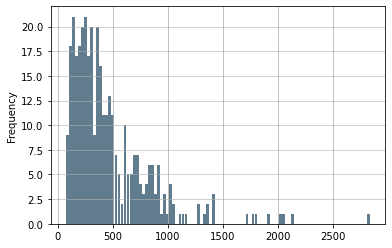

In [16]:
commutes = lin_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [17]:
temp = lin_post[(lin_post['like_count'] <= 1000) & (lin_post['like_count'] > 500)]
temp

,new_date,message,jieba_results,like_count
246,2019-05-01,今天是5月1日勞動節，各位勞工朋友大家辛苦了！\n岱樺在此祝福所有的勞工朋友們平安、健康、快樂！\n讓勞工朋友的勞動環境與勞動條件都能一年比一年好\n是岱樺作為國會議員努力的目標\n＃不遺餘力，＃也會更加努力！\n \n＃岱你監督 \n＃最打拼ㄟ立委\n＃岱地方拚發展,今天 是 月 日 勞動節 各位 勞工 朋友 大家 辛苦 了 岱 樺 在 此 祝福 所有 的 勞工 朋友 們 平安 健康 快樂 讓 勞工 朋友 的 勞動 環境 與 勞動 條件 都 能 一年 比 一年 好 是 岱 樺 作為 國會 議員 努力 的 目標 不 遺餘力 也 會 更加 努力 岱 你 監督 最 打拼 ㄟ 立委 岱 地方 拚 發展,501
247,2019-09-09,謝謝昨天來參加岱樺大寮區座談會的朋友們，藉著大家聚在一起的機會，岱樺除了向各位鄉親朋友報告一下岱樺這些年來的努力外，也向大家說明岱樺接下要在大寮區努力的工作和目標。\n\n岱樺希望在接下來的日子裡，除了請各位好朋友們繼續給予岱樺及服務團隊支持和鼓勵外，也請各位好友們和岱樺站在一起，共同守護臺灣的民主價值、共同打拚地方發展的好將來！\n\n地方座談下一站，我們林園見\n\n#臺灣價值 #高雄 #大寮 #座談會 #拚地方發展出頭天,謝謝 昨天 來 參加 岱 樺 大 寮 區座 談會 的 朋友 們 藉 著 大家 聚在一起 的 機會 岱 樺 除了 向 各位 鄉親 朋友 報告 一下 岱 樺 這些 年 來 的 努力 外 也 向 大家 說明 岱 樺 接下 要 在 大 寮 區 努力 的 工作 和 目標 。 岱 樺 希望 在 接下 來 的 日子 裡 除了 請 各位 好 朋友 們 繼續 給予 岱 樺 及 服務 團隊 支持 和 鼓勵 外 也 請 各位 好友 們 和 岱 樺 站 在 一起 共同 守護 臺 灣的 民主 價值 共同 打 拚 地方 發展 的 好 將來 地方 座 談下 一站 我們 林園 見 # 臺 灣價值 # 高雄 # 大 寮 # 座 談會 # 拚 地方 發 展出 頭天,502
248,2019-06-13,#給畢業的你 \n\n孩子今日你將飛翔\n未來的道路上不必擔心害怕 \n咱的家是你最好的後盾\n\n#因為你們值得所以岱樺願意,# 給畢業 的 你 孩子 今日 你 將飛翔 未來 的 道路 上 不必 擔心 害怕 咱 的 家 是 你 最好 的 後 盾 # 因為 你 們 值得 所以 岱 樺 願意,506
249,2019-08-13,「投資台灣、衝經濟」\n\n今天感謝經濟部沈榮津部長南下大發工業區與廠商及鄉親座談，岱樺也把握這個機會更深入瞭解業者的訴求，會中部長向大家聊起台商回台2.0行動方案、根留台灣企業投資方案、中小企業投資方案等投資台灣三大方案獎勵優惠措施。\n\n岱樺與在場與會者最關切的不外乎是人才培訓以及根留台灣等議題，沈榮津部長也一一回應廠商各項需求。\n\n#據統計兩工業區廠商預計加碼投資162億元\n#創造約1000個工作機會\n\n照片來源：大發工業區廠商協進會提供,投資 台灣 衝經濟 今天 感謝 經濟部 沈榮津 部長 南下 大發 工業區 與 廠 商及 鄉親 座談 岱 樺 也 把握 這個 機會 更 深入 瞭解業者 的 訴求 會 中部 長 向 大家 聊起 台商 回台 . 行動 方案 根留 台灣 企業 投資 方案 中小 企業 投資 方案 等 投資 台灣 三大 方案 獎勵 優惠 措施 。 岱 樺 與 在場 與 會者 最 關切 的 不外乎 是 人才 培訓 以及 根留 台灣 等 議題 沈榮津 部長 也 一 一回 應廠 商各項 需求 。 # 據 統計 兩 工業區 廠商 預計 加碼 投資 億元 # 創造 約 個 工作 機會 照片 來源 大發 工業區 廠 商協 進會 提供,507
250,2019-08-02,向鄉親報告 防洪作業持續進行中\n\n近日時有艷陽高照，但一過中午大雨不斷的情形，岱樺知道鄉親好友最關注的，莫過於是淹水問題，歷經去年瞬間強降雨各區淹水，不論在中央或地方，岱樺跟政府團隊皆多次會議商討，只盼能降低災害。\n\n今年初起，岱樺除勘查後勁溪排水系統、大寮區拷潭排水以及林園排水外，也到中央召開會議，並成功爭取中央經費的支持！\n\n現正進行中的是八涳橋清淤作業！\n\n#午後大雨請鄉親好友注意安全,向 鄉親 報告 防洪 作業 持續 進行 中 近日 時有艷陽 高照 但 一過 中午 大雨 不斷 的 情形 岱 樺 知道 鄉親 好友 最關 注 的 莫過 於 是 淹水 問題 歷經 去年 瞬間強 降雨 各區 淹水 不論 在 中央 或 地方 岱 樺 跟 政府 團隊 皆 多次 會議 商討 只 盼 能 降低 災害 。 今年初 起 岱 樺 除 勘查 後 勁溪 排水 系統 大 寮 區拷潭 排水 以及 林園 排水 外 也 到 中央 召開會議 並 成功 爭取 中央 經費 的 支持 現正 進行 中 的 是 八 涳 橋 清淤 作業 # 午 後 大雨 請 鄉親 好友 注意安全,508
...,...,...,...,...
332,2020-01-01,新年快樂～\n\n2020年的第一天，祝福大家一切順心、一切如意，另外在1/11那天，一定要出來投票，一起做對的選擇，讓高雄更好、讓民主與進步繼續\n\n#2020新年快樂 #1起做對的選擇 #台灣更好高雄更好,新年 快樂 年 的 第一天 祝福 大家 一切 順心 一切 如意 另外 在 / 那天 一定 要 出來 投票 一起 做 對 的 選擇 讓 高雄 更好 讓 民主 與 進步 繼續 # 新年 快樂 # 起 做 對 的 選擇 # 台灣 更好 高雄 更好,944
333,2019-08-25,雖然白鹿颱風沒有把高雄搗亂的太嚴重，但部份地區還是有傳出零星災清。接下來的可能還會帶來大量雨勢，岱樺提醒大家，天氣不穩，還是要多注意安全。\n\n另外昨天垃圾清運因颱風暫停一次，今天有加開垃圾車班次，別忘了記得家裡的垃圾要記得丟喔！\n\n#高雄平安,雖然 白鹿 颱 風 沒 有 把 高雄 搗 亂 的 太 嚴重 但 部份 地區 還是 有 傳出 零星 災清 。 接下 來 的 可能 還會 帶來 大量 雨勢 岱 樺 提醒 大家 天氣 不穩 還是 要 多 注意安全 。 另外 昨天 垃圾 清運因 颱 風 暫停 一次 今天 有加 開 垃圾 車 班次 別 忘 了 記得家裡 的 垃圾 要 記得 丟 喔 # 高雄 平安,963
334,2019-12-20,早安～\n天氣冷冷的，記得做好保暖哦！\n\n#1起讓高雄更好 #做對的選擇 #讓民主與進步繼續,早安 天氣 冷冷的 記得 做好 保暖 哦 # 起 讓 高雄 更好 # 做 對 的 選擇 # 讓 民主 與 進步 繼續,965
335,2019-12-28,早安～\n\n原先高雄市民所享有澄清湖風景區免費入園的福利優惠，僅到今年的9月份為止。為了能讓這項屬於鄉親的優惠得到延續，所以岱樺特別邀集相關位進行協商，並成功爭取到市民免費入園的優惠能夠將再延續。\n\n#1起讓高雄更好 #用行動愛高雄 #做對的選擇 #讓民主與進繼續,早安 原先 高雄市 民所 享有 澄清湖 風景區 免費 入園 的 福利 優惠 僅到 今年 的 月份 為止 。 為 了 能 讓 這項屬 於 鄉親 的 優惠 得到 延續 所以 岱 樺 特別 邀集 相關位 進行 協商 並 成功 爭取 到 市民 免費 入園 的 優惠能 夠將 再延 續 。 # 起 讓 高雄 更好 # 用行動 愛高雄 # 做 對 的 選擇 # 讓 民主 與 進 繼續,977


In [18]:
corpus = temp['jieba_results'].values.tolist()

In [19]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [20]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['配偶', '所以', '農業', '教育', '工廠', '支持', '國中', '冬至', '仁武', '我們']
TOP 10 WORDS PER TOPIC #1
['林園', '圖書館', '一直', '改善', '教育', '文化', '端午', '安康', '存在', '排水']
TOP 10 WORDS PER TOPIC #2
['未來', '工程', '葉慈', '中秋', '毛豆', '勞工', '改善', '照片', '孩子', '排水']
TOP 10 WORDS PER TOPIC #3
['林園', '我們', '選擇', '早安', '一起', '進步', '更好', '高雄', '民主', '繼續']
TOP 10 WORDS PER TOPIC #4
['處理', '發展', '自己', '紅豆', '天氣', '我們', '更好', '地方', '鄉親', '努力']
TOP 10 WORDS PER TOPIC #5
['時間', '節快', '加油', '高雄市', '地點', '鄉親', '大家', '情人', '仁武', '掃街']
TOP 10 WORDS PER TOPIC #6
['更好', '業區', '大工', '林園', '我們', '中秋', '香港', '問題', '投票', '紅豆']
TOP 10 WORDS PER TOPIC #7
['鄉親', '感謝', '高雄', '繼續', '垃圾', '點睛', '投給', '雨勢', '大家', '台灣']


In [23]:
LDA.fit(X)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['加油', '一起', '競選總部', '蔡英文', '我們', '小英總統', '台灣', '更好', '高雄', '大家']
TOP 10 WORDS PER TOPIC #1
['工作', '道路', '通報', '高雄', '大家', '更好', '鄉親', '仁武', '我們', '改善']
TOP 10 WORDS PER TOPIC #2
['教育', '努力', '除了', '香港', '農會', '國小', '爭取', '更好', '我們', '林園']
TOP 10 WORDS PER TOPIC #3
['除了', '中秋', '更好', '高捷', '林園', '教育', '所有', '延伸', '國中', '爭取']
TOP 10 WORDS PER TOPIC #4
['完成', '優質', '新竹', '天氣', '支持', '粉絲', '抽獎', '農特產', '台灣', '我們']
TOP 10 WORDS PER TOPIC #5
['努力', '繼續', '支持', '一起', '今天', '紅豆', '朋友', '我們', '鄉親', '大家']
TOP 10 WORDS PER TOPIC #6
['繼續', '提醒', '發展', '大陸', '排水', '進行', '地方', '鄉親', '問題', '文化']
TOP 10 WORDS PER TOPIC #7
['鄉親', '更好', '各位', '高雄', '地方', '朋友', '立委', '努力', '林岱', '仁武']


In [25]:
politics_lin = politics[politics.姓名 == "林 岱 樺"].政見.to_string()
politics_lin = re.sub(re_punctuation, "", politics_lin)
politics_lin = re.sub(r'[0-9]','',politics_lin)
politics_lin = re.sub(r'[a-zA-Z]','',politics_lin)
jieba.load_userdict("dict.txt")
words = jieba.lcut(politics_lin, cut_all = False)
print(words)

[' ', ' ', ' ', ' ', '林岱', '樺', '長', '年', '在', '國會', '經濟', '委員', '會', '，', '重視', '大', '寮', '、', '林園', '、', '仁武', '、', '鳥松', '經濟', '發展', '，', '林岱', '樺', '認為', '只有', '高雄', '好', '，', '台灣', '才', '會', '更好', '，', '不管', '大小', '地', ' ', '方事', '，', '林岱', '樺', '都', '為', '您', '做到', '最好', '。', ' ', '一', '、', '『', '交通', '』', '－', '讓', '城鄉', '沒有', '距離', '\u3000', '\u3000', '推動捷', '運林園', '延伸', '線', '、', '鳳松', '輕軌', '捷運線', '。', ' ', '\u3000', '\u3000', '推動區域', '交通', '平衡', '發展', '，', '縮', '小城', '鄉', '差距', '，', '促進', '地區', '繁榮', ' ', '二', '、', '『', '教育', '』', '－', '贏在', '起跑', '點的', '下一代', '\u3000', '\u3000', '改善', '教育', '環境', '，', '提升', '教學', '設備', '，', '促進', '區域', '教學品', '質及', '平衡', '教學', '資源', '分配', '。', ' ', '三', '、', '『', '長', '照', '』', '－', '普及', '、', '平價', '、', '優質', '的', '長期', '照護', '系統', '\u3000', '\u3000', '促進', '政府', '推動', '各區', '老人', '日托', '、', '扶助', '老人', '社區', '參', '與', '及', '補助', '計畫', '，', '以', '因應', '日', '趨', '嚴重', '的', '人口老化', '問題', '。', ' ', '四', '、', '『', '就業', '』', '－', '人人', '安薪樂業',

In [26]:
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(words)  
word = vectorizer.get_feature_names() 
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['不管', '推動捷', '做到', '大小', '完善', '高雄', '台灣', '設備', '鼓勵', '環境']
TOP 10 WORDS PER TOPIC #1
['沒有', '地區', '問題', '為南', '增進', '各區', '優質', '活動', '就業機會', '發展']
TOP 10 WORDS PER TOPIC #2
['募資法', '安薪樂業', '空間', '補助', '融合', '雨季', '仁大澄觀', '方事', '教育', '生活']
TOP 10 WORDS PER TOPIC #3
['小城', '新興', '管道', '錄用', '排水', '參與並', '務必', '仁武', '提升', '政府']
TOP 10 WORDS PER TOPIC #4
['中小', '南段', '扶助', '區域', '就業', '積水及', '督促', '經濟', '開發', '改善']
TOP 10 WORDS PER TOPIC #5
['地方', '山丘陵', '贏在', '山水', '居住', '品質', '重視', '平衡', '林岱', '促進']
TOP 10 WORDS PER TOPIC #6
['人人', '起跑', '認為', '特定', '差距', '再有', '城鄉', '教學', '交通', '老人']
TOP 10 WORDS PER TOPIC #7
['影響', '平價', '募集', '推動區域', '嚴重', '推動', '系統', '打造', '產業', '社區']


In [27]:
doc_names = range(len(lin)) #林岱樺有幾篇文章
doc_names

range(0, 362)